In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [42]:
datahappy = pd.read_csv('./data/2020_happiness_report.csv')
datahappy.head()

,country,happiness_score,gdp_per_capita,social_support,health,freedom,generosity,government_trust,dystopia_residual,continent
0,Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,Europe
1,Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,Europe
2,Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,Europe
3,Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,Europe
4,Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,Europe


In [43]:
datahappy.shape

(138, 10)

In [44]:
datahappy.drop(['happiness_score'], axis = 1, inplace=True) 

In [45]:
datahappy

,country,gdp_per_capita,social_support,health,freedom,generosity,government_trust,dystopia_residual,continent
0,Finland,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,Europe
1,Denmark,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,Europe
2,Switzerland,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,Europe
3,Iceland,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,Europe
4,Norway,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,Europe
...,...,...,...,...,...,...,...,...,...
133,Botswana,0.997549,1.085695,0.494102,0.509089,0.033407,0.101786,0.257241,Africa
134,Tanzania,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881,0.718963,Africa
135,Rwanda,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,Africa
136,Zimbabwe,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,Africa


In [88]:
datahappy.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [98]:
datahappy[datahappy['country'] == 'Mexico']

,country,gdp_per_capita,social_support,health,freedom,generosity,government_trust,dystopia_residual,continent
23,Mexico,1.024387,1.226333,0.831601,0.553893,0.083094,0.083134,2.66254,North America


In [47]:
datacovid = pd.read_csv('./data/covid-19-all.csv.zip')
datacovid.head()

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
0,China,Anhui,31.8257,117.2264,1.0,NaN,NaN,2020-01-22
1,China,Beijing,40.1824,116.4142,14.0,NaN,NaN,2020-01-22
2,China,Chongqing,30.0572,107.8740,6.0,NaN,NaN,2020-01-22
3,China,Fujian,26.0789,117.9874,1.0,NaN,NaN,2020-01-22
4,China,Gansu,35.7518,104.2861,NaN,NaN,NaN,2020-01-22


In [48]:
datacovid.describe()

,Latitude,Longitude,Confirmed,Recovered,Deaths
count,983418.000000,983418.000000,9.834000e+05,9.830280e+05,982977.000000
mean,36.045178,-73.526484,6.036703e+03,3.823701e+03,188.997422
std,12.557841,51.833919,4.119410e+04,5.066675e+04,1414.365494
min,-52.368000,-174.159600,-3.028440e+05,-8.544050e+05,-178.000000
25%,33.413578,-96.456209,3.400000e+01,0.000000e+00,0.000000
50%,37.937575,-86.993200,2.450000e+02,0.000000e+00,4.000000
75%,41.927342,-78.277155,1.298000e+03,0.000000e+00,28.000000
max,72.000000,178.065000,2.321996e+06,5.889896e+06,56293.000000


In [49]:
datacovid.drop(['Province/State','Latitude', 'Longitude', 'Date'], axis = 1, inplace=True) 

In [50]:
count_nan = len(datacovid) - datacovid.count() #cantidad de celdas vacias por columna
print(count_nan)

Country/Region      0
Confirmed          19
Recovered         391
Deaths            442
dtype: int64


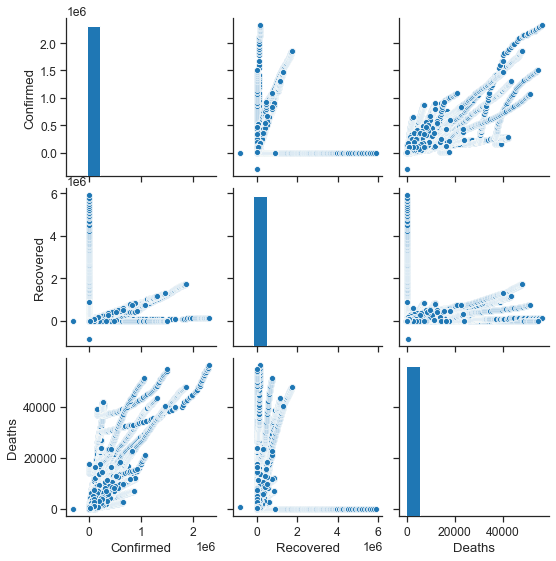

In [51]:
sns.pairplot(datacovid)

In [52]:
datacovid[(datacovid['Confirmed'] < 0)]

,Country/Region,Confirmed,Recovered,Deaths
832645,Colombia,-302844.0,0.0,0.0


In [53]:
datacovid[(datacovid['Recovered'] < 0)]

,Country/Region,Confirmed,Recovered,Deaths
678265,Colombia,0.0,-12684.0,-178.0
800960,Colombia,0.0,-8072.0,-154.0
820762,Colombia,0.0,-854405.0,505.0


In [54]:
datacovid[(datacovid['Deaths'] < 0)]

,Country/Region,Confirmed,Recovered,Deaths
678265,Colombia,0.0,-12684.0,-178.0
800960,Colombia,0.0,-8072.0,-154.0


In [55]:
datacovid= datacovid.drop(datacovid[datacovid['Confirmed'] < 0].index)

In [56]:
datacovid= datacovid.drop(datacovid[datacovid['Recovered'] < 0].index)

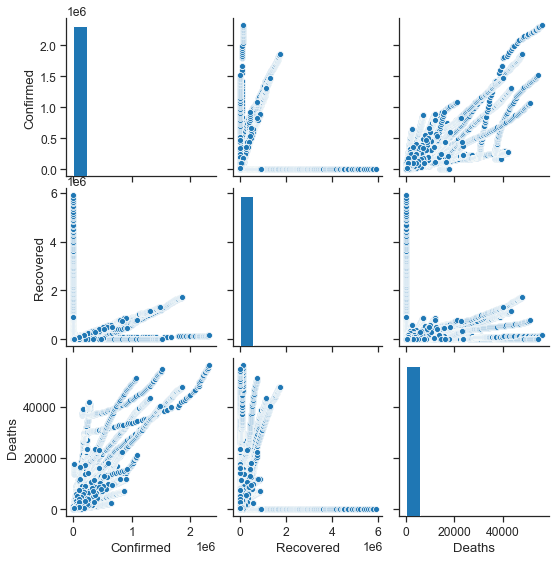

In [57]:

sns.pairplot(datacovid)

In [58]:
datacovid.rename(columns = {'Country/Region':'country'}, inplace = True)

In [59]:
grouped_data = datacovid.groupby(['country'], as_index = False).sum()
grouped_data

,country,Confirmed,Recovered,Deaths
0,Afghanistan,7387702.0,5128106.0,251784.0
1,Albania,2566014.0,1372081.0,64504.0
2,Algeria,8485107.0,5748927.0,319094.0
3,Andorra,515626.0,399210.0,13710.0
4,Angola,975124.0,437111.0,28313.0
...,...,...,...,...
213,Vietnam,188083.0,153619.0,4138.0
214,West Bank and Gaza,6057124.0,4583396.0,49507.0
215,Yemen,338531.0,192481.0,95897.0
216,Zambia,2015131.0,1836532.0,44784.0


In [93]:
joined_df = grouped_data.merge(datahappy)
joined_df

,country,Confirmed,Recovered,Deaths,gdp_per_capita,social_support,health,freedom,generosity,government_trust,dystopia_residual,continent
0,Afghanistan,7387702.0,5128106.0,251784.0,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236,Asia
1,Albania,2566014.0,1372081.0,64504.0,0.906653,0.830484,0.846330,0.461946,0.171028,0.025361,1.640897,Europe
2,Algeria,8485107.0,5748927.0,319094.0,0.943856,1.143004,0.745419,0.083944,0.118915,0.129191,1.840812,Africa
3,Argentina,114309026.0,91192612.0,2881217.0,1.028466,1.372544,0.849774,0.520840,0.070100,0.060415,2.072541,South America
4,Armenia,11180494.0,8208215.0,190542.0,0.808262,1.034577,0.775857,0.378076,0.107226,0.104618,1.468162,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
128,Venezuela,9876958.0,8527698.0,84762.0,0.770239,1.348547,0.767026,0.271717,0.087179,0.063625,1.744841,South America
129,Vietnam,188083.0,153619.0,4138.0,0.718092,1.253075,0.819134,0.650836,0.136489,0.089848,1.685978,Asia
130,Yemen,338531.0,192481.0,95897.0,0.392702,1.177477,0.415000,0.243721,0.094689,0.087352,1.116473,Asia
131,Zambia,2015131.0,1836532.0,44784.0,0.536834,0.896037,0.363593,0.491318,0.250621,0.086705,1.134339,Africa


In [61]:
joined_df.columns

Index(['country', 'Confirmed', 'Recovered', 'Deaths', 'gdp_per_capita',
       'social_support', 'health', 'freedom', 'generosity', 'government_trust',
       'dystopia_residual', 'continent'],
      dtype='object')

In [62]:
# Se separan las características: en este caso todos los datos con excepción de la columna del nombre de los jugadores
x =joined_df.loc[:,'Confirmed':'dystopia_residual'].values 

# Se separan el target: Columna de Jugadores
y = joined_df.loc[:,['continent']].values

In [63]:

# Se estandarizan las características:

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

In [65]:
principalComponents.shape

(133, 3)

In [66]:
pca_df = pd.DataFrame(principalComponents, columns=['PC1', 'PC2', 'PC3'])
pca_df['continent'] = y
pca_df.head()

,PC1,PC2,PC3,continent
0,-4.716249,1.515423,0.835435,Asia
1,-0.747524,-0.130638,0.501488,Europe
2,-1.074379,0.043980,1.590937,Africa
3,1.198455,1.001325,1.216306,South America
4,-0.698486,-0.042155,0.951979,Asia


In [99]:
print(pca.explained_variance_ratio_) #mostrando porcentaje de varianza de los 3 PCA
print(sum(pca.explained_variance_ratio_)) #suma de porcentajes de varianza de los 3 PCA

[0.31877367 0.2707635  0.13648207]
0.726019240421079


In [100]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [68]:
features = ['Confirmed', 'Recovered', 'Deaths', 'gdp_per_capita',
       'social_support', 'health', 'freedom', 'generosity', 'government_trust',
       'dystopia_residual']

loadingsTable = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_), 
                        columns=['PC1', 'PC2', 'PC3'], index=features)
loadingsTable

,PC1,PC2,PC3
Confirmed,0.387316,0.912854,-0.071507
Recovered,0.337213,0.910390,-0.077329
Deaths,0.443778,0.806866,-0.025208
gdp_per_capita,0.861799,-0.255135,0.274993
social_support,0.795393,-0.322956,0.236385
health,0.857880,-0.283489,0.228775
freedom,0.636960,-0.231830,-0.420563
generosity,0.041774,-0.123282,-0.847393
government_trust,0.480872,-0.296746,-0.516505
dystopia_residual,0.034841,-0.090767,-0.133676


In [69]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
fig = px.scatter(pca_df, x='PC1', y='PC2', color='continent')
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [70]:
fig = px.imshow(loadings,
                labels=dict(x="Principal Components", y="Features", color="Loadings"),
                x=['PC1', 'PC2', 'PC3'],
                y=features
                )
fig.update_xaxes(side="top")
fig.show()

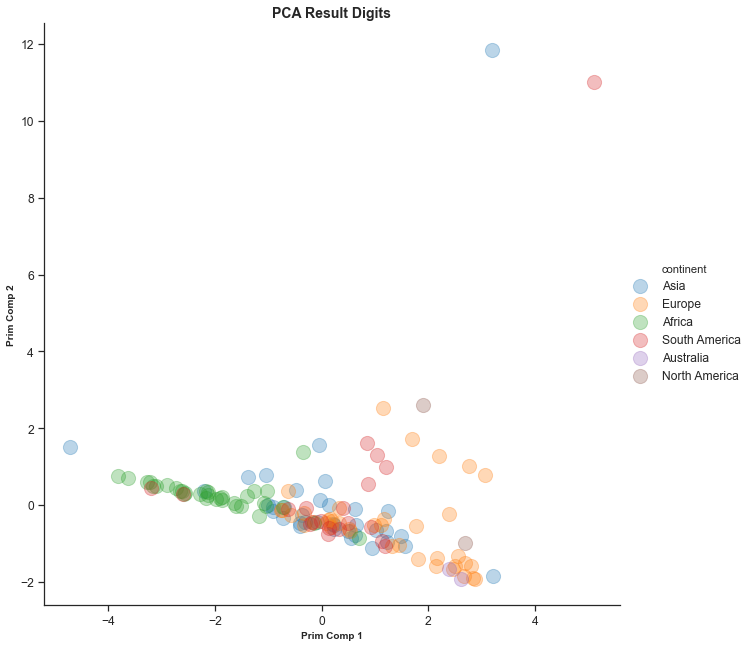

In [84]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='PC1',
           y='PC2',
          data=pca_df,
          fit_reg=False,
          legend=True,
          height=9,
          hue='continent',
          scatter_kws={"s":200, "alpha":0.3})
plt.title('PCA Result Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prim Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prim Comp 2', weight='bold').set_fontsize('10')


In [72]:
import plotly.express as px
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',
              color='continent', size_max=18,
              opacity=0.7)
fig.show()

In [82]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    principalComponents,
    labels=labels,
    dimensions=range(3),
    color=pca_df['continent']
)
fig.update_traces(diagonal_visible=False)

fig.show()

In [85]:
joined_df.corr()["Confirmed"]

Confirmed            1.000000
Recovered            0.983045
Deaths               0.857703
gdp_per_capita       0.084356
social_support      -0.001161
health               0.052690
freedom              0.064383
generosity          -0.040479
government_trust    -0.038775
dystopia_residual   -0.069736
Name: Confirmed, dtype: float64

<AxesSubplot:xlabel='Confirmed', ylabel='freedom'>

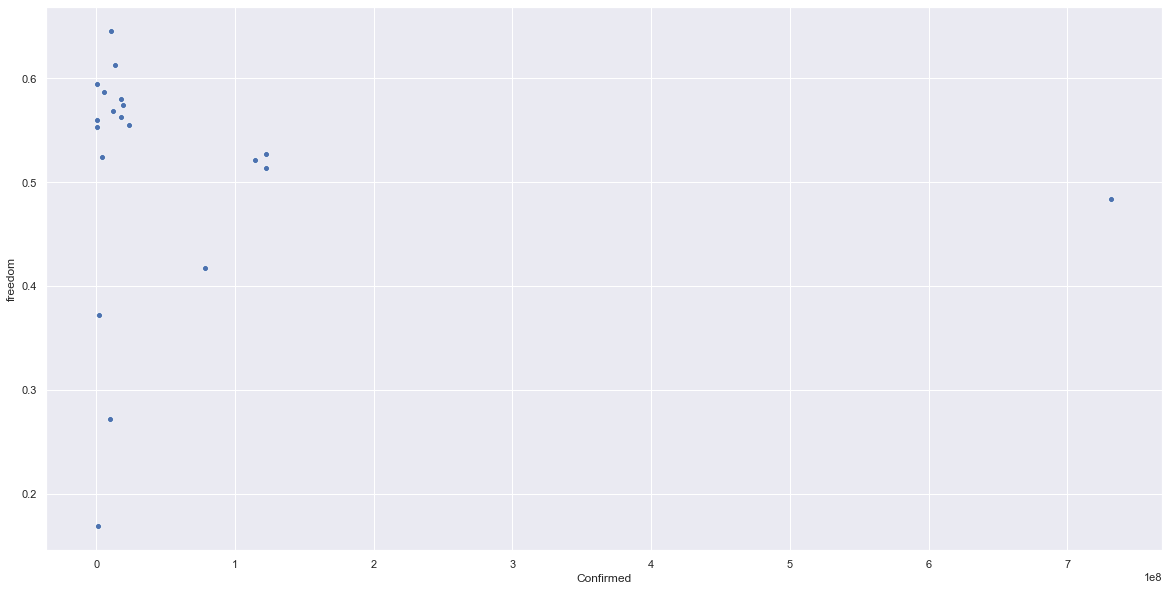

In [101]:
pais = joined_df[(joined_df['continent'] == 'South America')]
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x='Confirmed', y='freedom', data= pais)

In [103]:

fig = px.scatter(joined_df, x='Confirmed', y='freedom', color="continent",size='Deaths',
                 hover_data=['country'])
fig.show()